In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [3]:
# Set the API base URL
url =f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rongelap
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | kayangel
Processing Record 9 of Set 1 | kismayo
Processing Record 10 of Set 1 | capao da canoa
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | singkil
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | pancas
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | mahina
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | turpan
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | margaret river
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rongelap,11.1635,166.8941,26.81,82,84,10.17,MH,1704856893
1,grytviken,-54.2811,-36.5092,5.01,94,96,1.52,GS,1704857079
2,iqaluit,63.7506,-68.5145,-25.73,68,20,9.77,CA,1704857080
3,adamstown,-25.0660,-130.1015,24.76,86,100,3.08,PN,1704857080
4,puerto ayora,-0.7393,-90.3518,25.31,93,39,3.58,EC,1704857080


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,26.81,82,84,10.17,MH,1704856893
1,grytviken,-54.2811,-36.5092,5.01,94,96,1.52,GS,1704857079
2,iqaluit,63.7506,-68.5145,-25.73,68,20,9.77,CA,1704857080
3,adamstown,-25.0660,-130.1015,24.76,86,100,3.08,PN,1704857080
4,puerto ayora,-0.7393,-90.3518,25.31,93,39,3.58,EC,1704857080


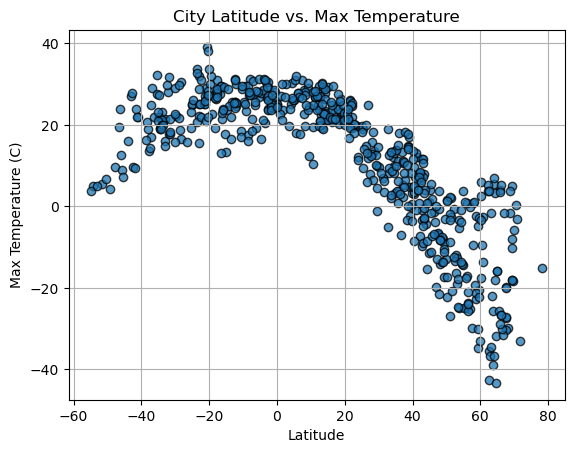

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

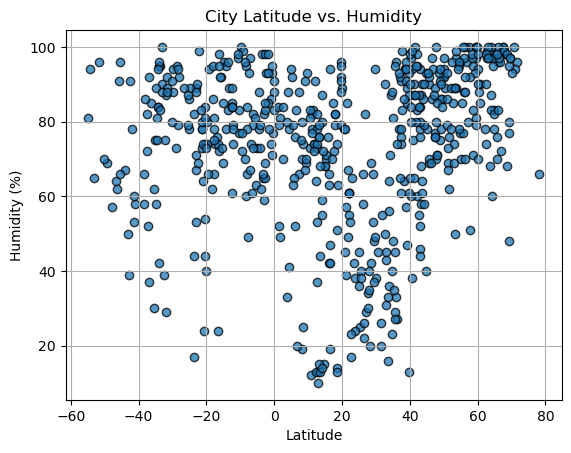

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

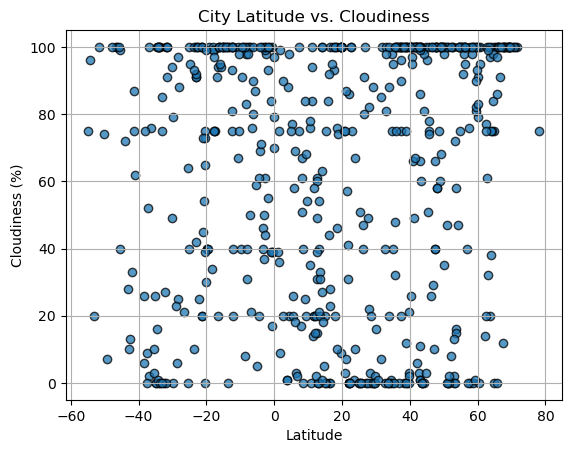

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df["Cloudiness"],edgecolors='black',alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

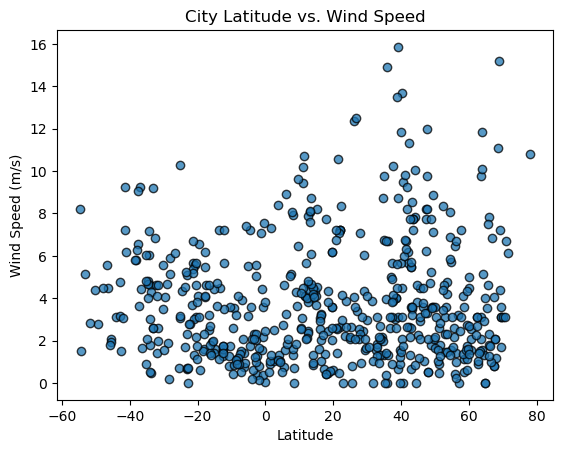

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [12]:
 #Define a function to create Linear Regression plots
 #use a template for charts
 def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)

    # regression line & plot
    plt.scatter(x_values, y_values, alpha=0.75)
    plt.plot(x_values, x_values * slope + intercept, "r-")
    
    
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    

    #  plot properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Show plot
    plt.show()
 

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,26.81,82,84,10.17,MH,1704856893
2,iqaluit,63.7506,-68.5145,-25.73,68,20,9.77,CA,1704857080
6,port blair,11.6667,92.7500,27.02,74,20,4.12,IN,1704857081
7,kayangel,8.0823,134.7173,28.66,70,61,7.94,PW,1704857081
12,stanley,54.8680,-1.6985,3.76,96,75,1.54,GB,1704857082


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,5.01,94,96,1.52,GS,1704857079
3,adamstown,-25.0660,-130.1015,24.76,86,100,3.08,PN,1704857080
4,puerto ayora,-0.7393,-90.3518,25.31,93,39,3.58,EC,1704857080
5,tolanaro,-25.0319,46.9987,25.04,78,40,10.29,MG,1704857081
8,kismayo,-0.3582,42.5454,25.92,77,39,7.54,SO,1704857081


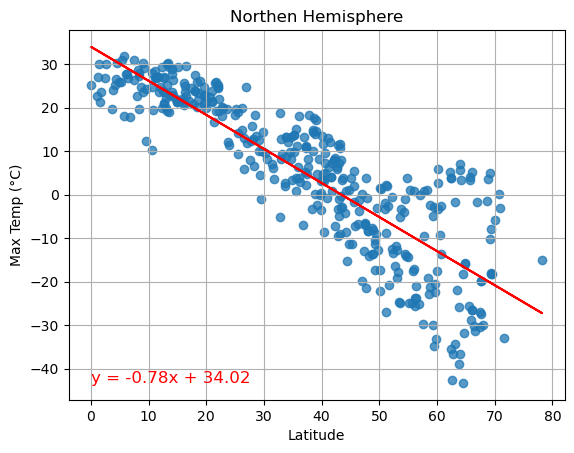

In [17]:
# Linear regression on Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern_max_temp = northern_hemi_df["Max Temp"]


plot_linear_regression(x_northern,y_northern_max_temp, "Latitude", "Max Temp (°C)",'Northen Hemisphere')



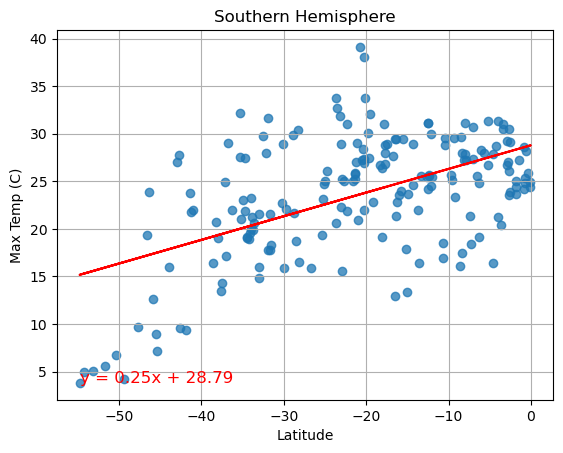

In [18]:
#Linear regression on Southern Hemisphere
x_southern=southern_hemi_df['Lat']
y_southern_max_temp=southern_hemi_df["Max Temp"]

plot_linear_regression(x_southern,y_southern_max_temp,"Latitude","Max Temp (C)","Southern Hemisphere")


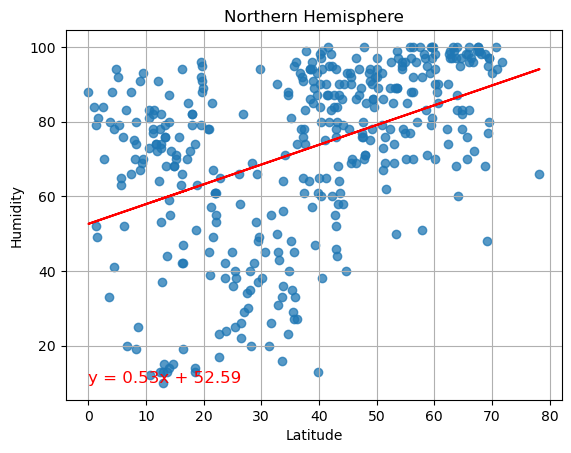

In [19]:
# Northern Hemisphere
x_north_humidity=northern_hemi_df["Lat"]
y_north_humidity=northern_hemi_df["Humidity"]

plot_linear_regression(x_north_humidity,y_north_humidity,'Latitude','Humidity','Northern Hemisphere')


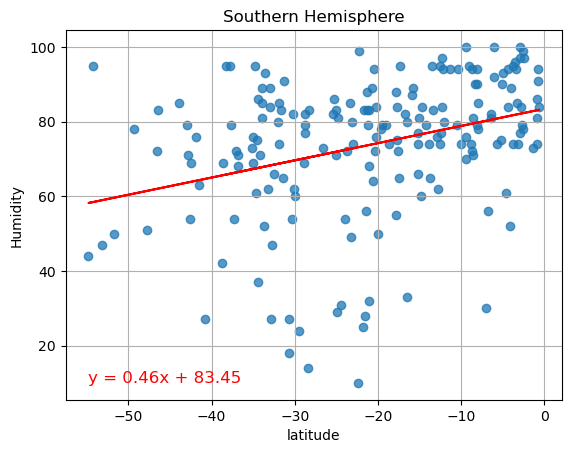

In [127]:
# Southern Hemisphere
x_southern_hum= southern_hemi_df["Lat"]
y_southern_hum=southern_hemi_df['Humidity']

plot_linear_regression(x_southern_hum,y_southern_hum,"latitude",'Humidity','Southern Hemisphere')

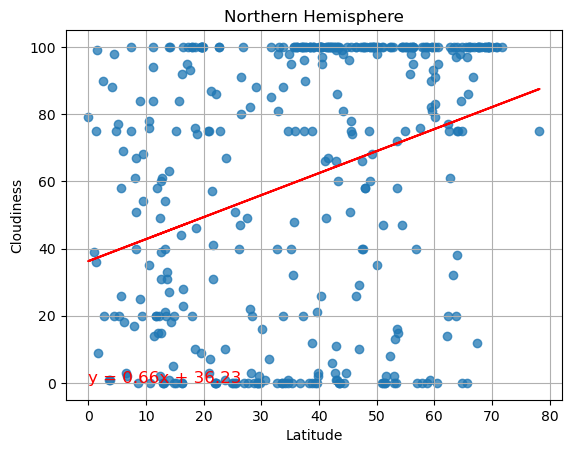

In [27]:
# Northern Hemisphere
x_north_clouds=northern_hemi_df['Lat']
y_north_clouds=northern_hemi_df['Cloudiness']

plot_linear_regression(x_north_clouds,y_north_clouds,'Latitude', "Cloudiness","Northern Hemisphere")

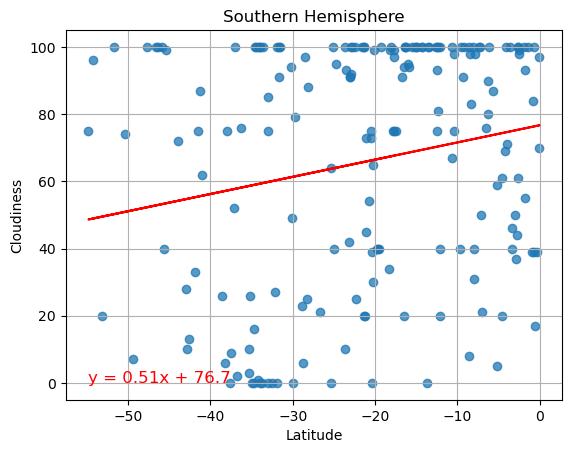

In [26]:
# Southern Hemisphere
x_south_clouds2=southern_hemi_df['Lat']
y_south_clouds2=southern_hemi_df['Cloudiness']

plot_linear_regression(x_south_clouds2,y_south_clouds2,'Latitude', "Cloudiness","Southern Hemisphere")

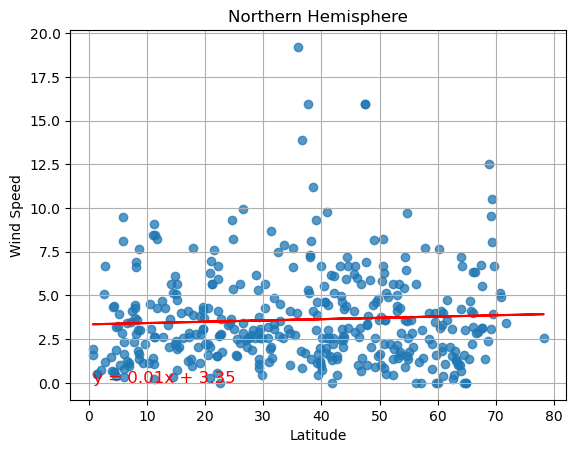

In [128]:
# Northern Hemisphere
x_north_wind=northern_hemi_df['Lat']
y_north_wind=northern_hemi_df['Wind Speed']

plot_linear_regression(x_north_wind,y_north_wind,'Latitude', "Wind Speed","Northern Hemisphere")

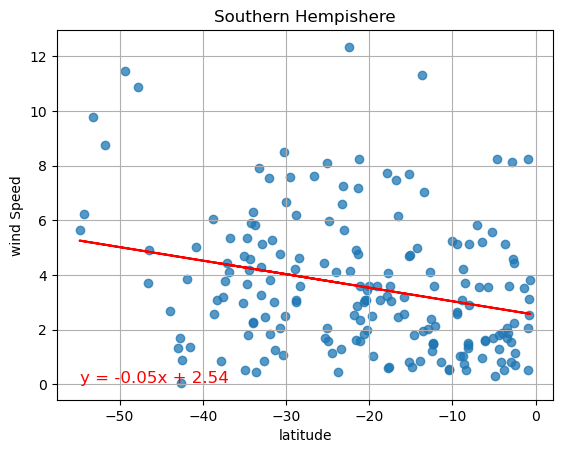

In [130]:
# Southern Hemisphere
x_south_wind=southern_hemi_df["Lat"]
y_south_wind=southern_hemi_df['Wind Speed']
plot_linear_regression(x_south_wind,y_south_wind,"latitude","wind Speed","Southern Hempishere")